## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import config_notebook as c
import datetime

## Set global parameters

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
loss_function = nn.CrossEntropyLoss()

## Initialize models

In [5]:
from src.unet import UNet

# Initialize models
unet = UNet()

## Load data

In [6]:
from src.dataloader_anaglyph_reversed import make_dataloaders

# Make dataloaders
training_dl = make_dataloaders(path_anaglyph=c.TRAIN_ANAGLYPH_FILE, path_reversed=c.TRAIN_REVERSED_FILE)
validation_dl = make_dataloaders(path_anaglyph=c.VALIDATION_ANAGLYPH_FILE, path_reversed=c.VALIDATION_REVERSED_FILE)
print(len(training_dl), len(validation_dl))

156 39


In [7]:
first_item = next(iter(training_dl))
print(first_item['a'].shape)
print(first_item['r'].shape)

torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


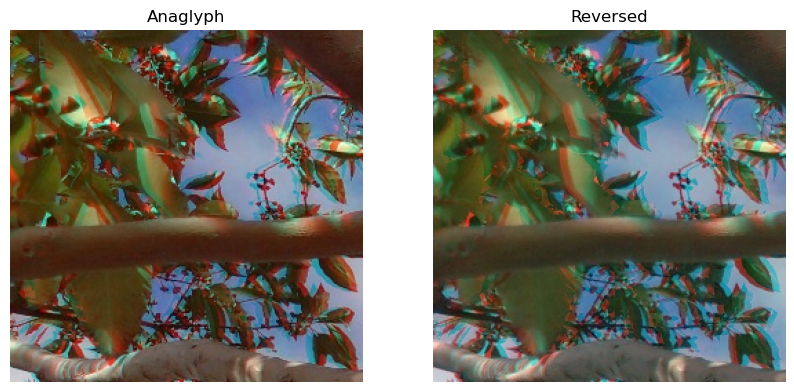

In [8]:
import torchvision.transforms as T

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

transform = T.ToPILImage()

# Plot the anaglyph image
axes[0].imshow(transform(first_item['a'][0]))  # Convert tensor to image
axes[0].set_title("Anaglyph")
axes[0].axis("off")

# Plot the reversed image
axes[1].imshow(transform(first_item['r'][0]))  # Convert tensor to image
axes[1].set_title("Reversed")
axes[1].axis("off")

plt.show()

## Training function

In [9]:
from src.train_unet import set_global_config
from src.train_unet import train_unet

# Create timestamp for training runs
training_run_timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print (f"Started training at {training_run_timestamp}")

In [10]:
# Test run to check if everything works

import config_notebook_test_run

# Set train config
set_global_config(config_notebook_test_run)

single_item_dl = make_dataloaders(path_anaglyph=c.TRAIN_ANAGLYPH_FILE, path_reversed=c.TRAIN_REVERSED_FILE, files_limit=1)

train_unet(model=unet, train_dl=single_item_dl, val_dl=single_item_dl, device=device, timestamp=training_run_timestamp)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [1/1], Loss (MSE): 0.0632, Loss (MAE): 0.2202, Loss (SSIM): 0.7790, Loss (PSNR): -11.9913
Epoch [1/1], Validation Loss (MSE): 0.0568, Validation Loss (MAE): 0.2115, Validation Loss (SSIM): 0.6916, Validation Loss (PSNR): -12.4594
Checkpoint saved at ./models/test/unet_checkpoint_20250123_163145_epoch1.pth


In [11]:
import config_notebook

# Set train config
set_global_config(config_notebook)

train_unet(model=unet, train_dl=training_dl, val_dl=validation_dl, device=device, timestamp=training_run_timestamp)

  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [1/100], Loss (MSE): 0.0367, Loss (MAE): 0.1492, Loss (SSIM): 0.2853, Loss (PSNR): -16.0269
Epoch [1/100], Validation Loss (MSE): 0.0204, Validation Loss (MAE): 0.1068, Validation Loss (SSIM): 0.2051, Validation Loss (PSNR): -18.2620


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [2/100], Loss (MSE): 0.0241, Loss (MAE): 0.1151, Loss (SSIM): 0.2125, Loss (PSNR): -18.4076
Epoch [2/100], Validation Loss (MSE): 0.0125, Validation Loss (MAE): 0.0764, Validation Loss (SSIM): 0.1613, Validation Loss (PSNR): -21.0330


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [3/100], Loss (MSE): 0.0201, Loss (MAE): 0.1030, Loss (SSIM): 0.1958, Loss (PSNR): -19.4567
Epoch [3/100], Validation Loss (MSE): 0.0091, Validation Loss (MAE): 0.0644, Validation Loss (SSIM): 0.1457, Validation Loss (PSNR): -22.5253


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [4/100], Loss (MSE): 0.0179, Loss (MAE): 0.0966, Loss (SSIM): 0.1860, Loss (PSNR): -20.0435
Epoch [4/100], Validation Loss (MSE): 0.0075, Validation Loss (MAE): 0.0583, Validation Loss (SSIM): 0.1419, Validation Loss (PSNR): -23.3117


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [5/100], Loss (MSE): 0.0167, Loss (MAE): 0.0929, Loss (SSIM): 0.1790, Loss (PSNR): -20.3939
Epoch [5/100], Validation Loss (MSE): 0.0066, Validation Loss (MAE): 0.0572, Validation Loss (SSIM): 0.1418, Validation Loss (PSNR): -23.5721


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [6/100], Loss (MSE): 0.0160, Loss (MAE): 0.0903, Loss (SSIM): 0.1733, Loss (PSNR): -20.6318
Epoch [6/100], Validation Loss (MSE): 0.0063, Validation Loss (MAE): 0.0559, Validation Loss (SSIM): 0.1418, Validation Loss (PSNR): -23.7832


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [7/100], Loss (MSE): 0.0154, Loss (MAE): 0.0884, Loss (SSIM): 0.1691, Loss (PSNR): -20.7957
Epoch [7/100], Validation Loss (MSE): 0.0061, Validation Loss (MAE): 0.0547, Validation Loss (SSIM): 0.1456, Validation Loss (PSNR): -23.9037


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [8/100], Loss (MSE): 0.0149, Loss (MAE): 0.0867, Loss (SSIM): 0.1657, Loss (PSNR): -20.9468
Epoch [8/100], Validation Loss (MSE): 0.0063, Validation Loss (MAE): 0.0561, Validation Loss (SSIM): 0.1444, Validation Loss (PSNR): -23.6904


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [9/100], Loss (MSE): 0.0144, Loss (MAE): 0.0849, Loss (SSIM): 0.1628, Loss (PSNR): -21.1038
Epoch [9/100], Validation Loss (MSE): 0.0061, Validation Loss (MAE): 0.0570, Validation Loss (SSIM): 0.1423, Validation Loss (PSNR): -23.6246


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [10/100], Loss (MSE): 0.0138, Loss (MAE): 0.0825, Loss (SSIM): 0.1586, Loss (PSNR): -21.3438
Epoch [10/100], Validation Loss (MSE): 0.0062, Validation Loss (MAE): 0.0568, Validation Loss (SSIM): 0.1382, Validation Loss (PSNR): -23.6332


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [11/100], Loss (MSE): 0.0134, Loss (MAE): 0.0810, Loss (SSIM): 0.1565, Loss (PSNR): -21.4757
Epoch [11/100], Validation Loss (MSE): 0.0061, Validation Loss (MAE): 0.0559, Validation Loss (SSIM): 0.1281, Validation Loss (PSNR): -23.7861


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [12/100], Loss (MSE): 0.0130, Loss (MAE): 0.0796, Loss (SSIM): 0.1543, Loss (PSNR): -21.6102
Epoch [12/100], Validation Loss (MSE): 0.0054, Validation Loss (MAE): 0.0530, Validation Loss (SSIM): 0.1254, Validation Loss (PSNR): -24.2093


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [13/100], Loss (MSE): 0.0125, Loss (MAE): 0.0778, Loss (SSIM): 0.1511, Loss (PSNR): -21.7813
Epoch [13/100], Validation Loss (MSE): 0.0052, Validation Loss (MAE): 0.0511, Validation Loss (SSIM): 0.1246, Validation Loss (PSNR): -24.5052


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [14/100], Loss (MSE): 0.0122, Loss (MAE): 0.0766, Loss (SSIM): 0.1491, Loss (PSNR): -21.8998
Epoch [14/100], Validation Loss (MSE): 0.0058, Validation Loss (MAE): 0.0530, Validation Loss (SSIM): 0.1341, Validation Loss (PSNR): -24.1707


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [15/100], Loss (MSE): 0.0118, Loss (MAE): 0.0751, Loss (SSIM): 0.1464, Loss (PSNR): -22.0440
Epoch [15/100], Validation Loss (MSE): 0.0048, Validation Loss (MAE): 0.0494, Validation Loss (SSIM): 0.1259, Validation Loss (PSNR): -24.7558


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [16/100], Loss (MSE): 0.0114, Loss (MAE): 0.0737, Loss (SSIM): 0.1442, Loss (PSNR): -22.1910
Epoch [16/100], Validation Loss (MSE): 0.0046, Validation Loss (MAE): 0.0487, Validation Loss (SSIM): 0.1259, Validation Loss (PSNR): -24.8899


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [17/100], Loss (MSE): 0.0110, Loss (MAE): 0.0723, Loss (SSIM): 0.1418, Loss (PSNR): -22.3474
Epoch [17/100], Validation Loss (MSE): 0.0046, Validation Loss (MAE): 0.0481, Validation Loss (SSIM): 0.1274, Validation Loss (PSNR): -24.9974


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [18/100], Loss (MSE): 0.0108, Loss (MAE): 0.0716, Loss (SSIM): 0.1404, Loss (PSNR): -22.4114
Epoch [18/100], Validation Loss (MSE): 0.0046, Validation Loss (MAE): 0.0475, Validation Loss (SSIM): 0.1232, Validation Loss (PSNR): -25.0427


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [19/100], Loss (MSE): 0.0107, Loss (MAE): 0.0707, Loss (SSIM): 0.1390, Loss (PSNR): -22.5044
Epoch [19/100], Validation Loss (MSE): 0.0042, Validation Loss (MAE): 0.0458, Validation Loss (SSIM): 0.1213, Validation Loss (PSNR): -25.3728


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [20/100], Loss (MSE): 0.0105, Loss (MAE): 0.0703, Loss (SSIM): 0.1379, Loss (PSNR): -22.5561
Epoch [20/100], Validation Loss (MSE): 0.0041, Validation Loss (MAE): 0.0458, Validation Loss (SSIM): 0.1195, Validation Loss (PSNR): -25.3332
Checkpoint saved at ./models/unet_checkpoint_20250123_163145_epoch20.pth


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [21/100], Loss (MSE): 0.0101, Loss (MAE): 0.0684, Loss (SSIM): 0.1348, Loss (PSNR): -22.7740
Epoch [21/100], Validation Loss (MSE): 0.0039, Validation Loss (MAE): 0.0436, Validation Loss (SSIM): 0.1141, Validation Loss (PSNR): -25.6972


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [22/100], Loss (MSE): 0.0100, Loss (MAE): 0.0684, Loss (SSIM): 0.1341, Loss (PSNR): -22.7732
Epoch [22/100], Validation Loss (MSE): 0.0038, Validation Loss (MAE): 0.0429, Validation Loss (SSIM): 0.1139, Validation Loss (PSNR): -25.8312


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [23/100], Loss (MSE): 0.0099, Loss (MAE): 0.0678, Loss (SSIM): 0.1329, Loss (PSNR): -22.8484
Epoch [23/100], Validation Loss (MSE): 0.0037, Validation Loss (MAE): 0.0419, Validation Loss (SSIM): 0.1130, Validation Loss (PSNR): -25.9692


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [24/100], Loss (MSE): 0.0099, Loss (MAE): 0.0676, Loss (SSIM): 0.1330, Loss (PSNR): -22.8510
Epoch [24/100], Validation Loss (MSE): 0.0038, Validation Loss (MAE): 0.0421, Validation Loss (SSIM): 0.1099, Validation Loss (PSNR): -25.9872


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [25/100], Loss (MSE): 0.0097, Loss (MAE): 0.0665, Loss (SSIM): 0.1314, Loss (PSNR): -22.9930
Epoch [25/100], Validation Loss (MSE): 0.0037, Validation Loss (MAE): 0.0406, Validation Loss (SSIM): 0.1029, Validation Loss (PSNR): -26.2699


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [26/100], Loss (MSE): 0.0096, Loss (MAE): 0.0661, Loss (SSIM): 0.1310, Loss (PSNR): -23.0360
Epoch [26/100], Validation Loss (MSE): 0.0039, Validation Loss (MAE): 0.0426, Validation Loss (SSIM): 0.1099, Validation Loss (PSNR): -25.9739


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [27/100], Loss (MSE): 0.0096, Loss (MAE): 0.0662, Loss (SSIM): 0.1299, Loss (PSNR): -23.0442
Epoch [27/100], Validation Loss (MSE): 0.0037, Validation Loss (MAE): 0.0405, Validation Loss (SSIM): 0.1047, Validation Loss (PSNR): -26.3215


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [28/100], Loss (MSE): 0.0091, Loss (MAE): 0.0645, Loss (SSIM): 0.1276, Loss (PSNR): -23.2284
Epoch [28/100], Validation Loss (MSE): 0.0036, Validation Loss (MAE): 0.0410, Validation Loss (SSIM): 0.1095, Validation Loss (PSNR): -26.1828


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [29/100], Loss (MSE): 0.0089, Loss (MAE): 0.0637, Loss (SSIM): 0.1262, Loss (PSNR): -23.3531
Epoch [29/100], Validation Loss (MSE): 0.0037, Validation Loss (MAE): 0.0402, Validation Loss (SSIM): 0.1068, Validation Loss (PSNR): -26.3097


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [30/100], Loss (MSE): 0.0087, Loss (MAE): 0.0629, Loss (SSIM): 0.1244, Loss (PSNR): -23.4417
Epoch [30/100], Validation Loss (MSE): 0.0036, Validation Loss (MAE): 0.0398, Validation Loss (SSIM): 0.1049, Validation Loss (PSNR): -26.4746


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [31/100], Loss (MSE): 0.0089, Loss (MAE): 0.0635, Loss (SSIM): 0.1244, Loss (PSNR): -23.3510
Epoch [31/100], Validation Loss (MSE): 0.0038, Validation Loss (MAE): 0.0413, Validation Loss (SSIM): 0.1076, Validation Loss (PSNR): -26.1730


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [32/100], Loss (MSE): 0.0086, Loss (MAE): 0.0625, Loss (SSIM): 0.1232, Loss (PSNR): -23.4662
Epoch [32/100], Validation Loss (MSE): 0.0036, Validation Loss (MAE): 0.0400, Validation Loss (SSIM): 0.1043, Validation Loss (PSNR): -26.3956


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [33/100], Loss (MSE): 0.0087, Loss (MAE): 0.0625, Loss (SSIM): 0.1225, Loss (PSNR): -23.4604
Epoch [33/100], Validation Loss (MSE): 0.0035, Validation Loss (MAE): 0.0392, Validation Loss (SSIM): 0.1041, Validation Loss (PSNR): -26.5799


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [34/100], Loss (MSE): 0.0085, Loss (MAE): 0.0617, Loss (SSIM): 0.1209, Loss (PSNR): -23.5805
Epoch [34/100], Validation Loss (MSE): 0.0035, Validation Loss (MAE): 0.0394, Validation Loss (SSIM): 0.1083, Validation Loss (PSNR): -26.4646


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [35/100], Loss (MSE): 0.0083, Loss (MAE): 0.0608, Loss (SSIM): 0.1191, Loss (PSNR): -23.6952
Epoch [35/100], Validation Loss (MSE): 0.0036, Validation Loss (MAE): 0.0405, Validation Loss (SSIM): 0.1137, Validation Loss (PSNR): -26.2753


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [36/100], Loss (MSE): 0.0081, Loss (MAE): 0.0601, Loss (SSIM): 0.1166, Loss (PSNR): -23.7718
Epoch [36/100], Validation Loss (MSE): 0.0035, Validation Loss (MAE): 0.0387, Validation Loss (SSIM): 0.1072, Validation Loss (PSNR): -26.6131


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [37/100], Loss (MSE): 0.0082, Loss (MAE): 0.0608, Loss (SSIM): 0.1188, Loss (PSNR): -23.6695
Epoch [37/100], Validation Loss (MSE): 0.0035, Validation Loss (MAE): 0.0389, Validation Loss (SSIM): 0.1107, Validation Loss (PSNR): -26.6392


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [38/100], Loss (MSE): 0.0080, Loss (MAE): 0.0596, Loss (SSIM): 0.1160, Loss (PSNR): -23.8376
Epoch [38/100], Validation Loss (MSE): 0.0037, Validation Loss (MAE): 0.0397, Validation Loss (SSIM): 0.1051, Validation Loss (PSNR): -26.4113


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [39/100], Loss (MSE): 0.0079, Loss (MAE): 0.0589, Loss (SSIM): 0.1139, Loss (PSNR): -23.9646
Epoch [39/100], Validation Loss (MSE): 0.0035, Validation Loss (MAE): 0.0391, Validation Loss (SSIM): 0.1101, Validation Loss (PSNR): -26.5876


  0%|          | 0/156 [00:00<?, ?it/s]

Epoch [40/100], Loss (MSE): 0.0077, Loss (MAE): 0.0580, Loss (SSIM): 0.1127, Loss (PSNR): -24.0476
Epoch [40/100], Validation Loss (MSE): 0.0036, Validation Loss (MAE): 0.0388, Validation Loss (SSIM): 0.1037, Validation Loss (PSNR): -26.6291
Checkpoint saved at ./models/unet_checkpoint_20250123_163145_epoch40.pth


  0%|          | 0/156 [00:00<?, ?it/s]

KeyboardInterrupt: 